In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


print("hello")

hello


In [ ]:
print ("hi")

df = pd.read_csv("KFC_Past_Sales_Dataset.csv")

df.head()

hi


,Year,Month,Country,Branch_ID,Sales,Customers,Marketing_Spend
0,2022,Aug,UK,KFC_UK_01,206611,4568,23891
1,2018,May,India,KFC_IN_01,69645,1715,6190
2,2020,Nov,UK,KFC_UK_01,170226,4672,6706
3,2024,Dec,Australia,KFC_AU_01,90483,2363,17230
4,2019,Nov,UK,KFC_UK_01,94260,2207,28050


In [ ]:
print(df.isna())

       Year  Month  Country  Branch_ID  Sales  Customers  Marketing_Spend
0     False  False    False      False  False      False            False
1     False  False    False      False  False      False            False
2     False  False    False      False  False      False            False
3     False  False    False      False  False      False            False
4     False  False    False      False  False      False            False
...     ...    ...      ...        ...    ...        ...              ...
7995  False  False    False      False  False      False            False
7996  False  False    False      False  False      False            False
7997  False  False    False      False  False      False            False
7998  False  False    False      False  False      False            False
7999  False  False    False      False  False      False            False

[8000 rows x 7 columns]


In [7]:
print(df.isna().sum())

Year               0
Month              0
Country            0
Branch_ID          0
Sales              0
Customers          0
Marketing_Spend    0
dtype: int64


In [ ]:
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [ ]:

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (8000, 7) 

number of rows:  8000
number of columns:  7


In [ ]:
df.dtypes

Year               int64
Month                str
Country              str
Branch_ID            str
Sales              int64
Customers          int64
Marketing_Spend    int64
dtype: object

In [38]:

df['Sales'] = pd.to_numeric(df['Sales'])
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format="%Y-%b", errors='coerce')


df.dtypes

Year               datetime64[ns]
Month                         str
Country                       str
Branch_ID                     str
Sales                       int64
Customers                   int64
Marketing_Spend             int64
Date                datetime64[s]
dtype: object

In [ ]:
df.describe(include='all')

,Year,Month,Country,Branch_ID,Sales,Customers,Marketing_Spend
count,8000,8000,8000,8000,8000.000000,8000.000000,8000.000000
unique,NaN,12,5,13,NaN,NaN,NaN
top,NaN,Feb,Canada,KFC_CA_02,NaN,NaN,NaN
freq,NaN,715,1669,844,NaN,NaN,NaN
mean,1970-01-01 00:00:00.000002021,NaN,NaN,NaN,148837.878625,3737.376875,17557.908250
min,1970-01-01 00:00:00.000002018,NaN,NaN,NaN,45193.000000,1500.000000,5001.000000
25%,1970-01-01 00:00:00.000002019,NaN,NaN,NaN,105914.500000,2609.000000,11310.000000
50%,1970-01-01 00:00:00.000002021,NaN,NaN,NaN,144951.500000,3724.000000,17642.500000
75%,1970-01-01 00:00:00.000002023,NaN,NaN,NaN,185739.250000,4885.000000,23716.500000
max,1970-01-01 00:00:00.000002024,NaN,NaN,NaN,293162.000000,6000.000000,30000.000000


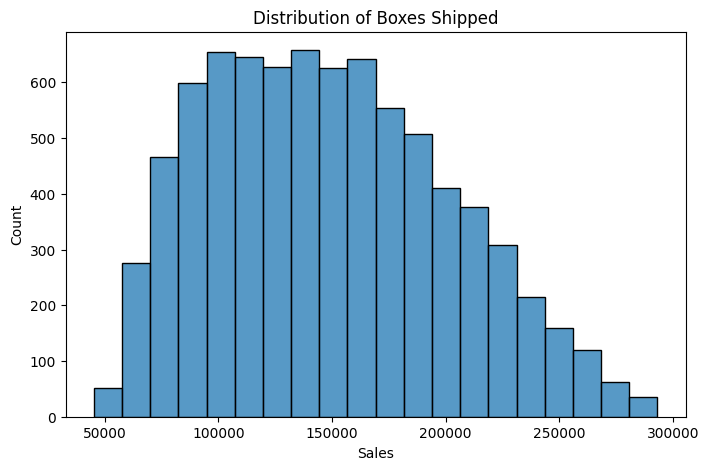

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

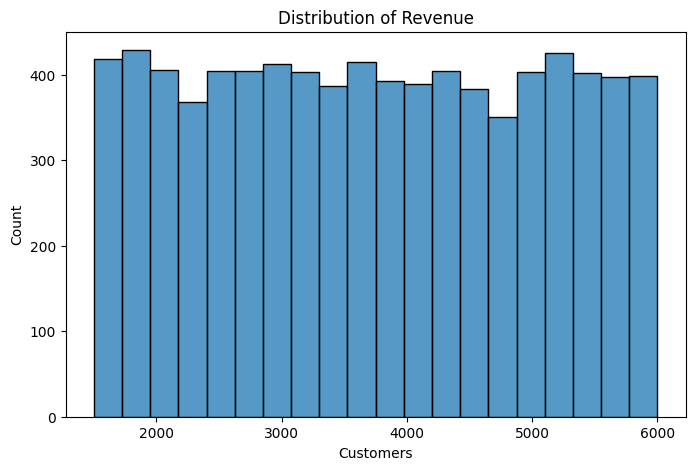

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Customers'], bins=20)
plt.title("Distribution of Revenue")
plt.show()

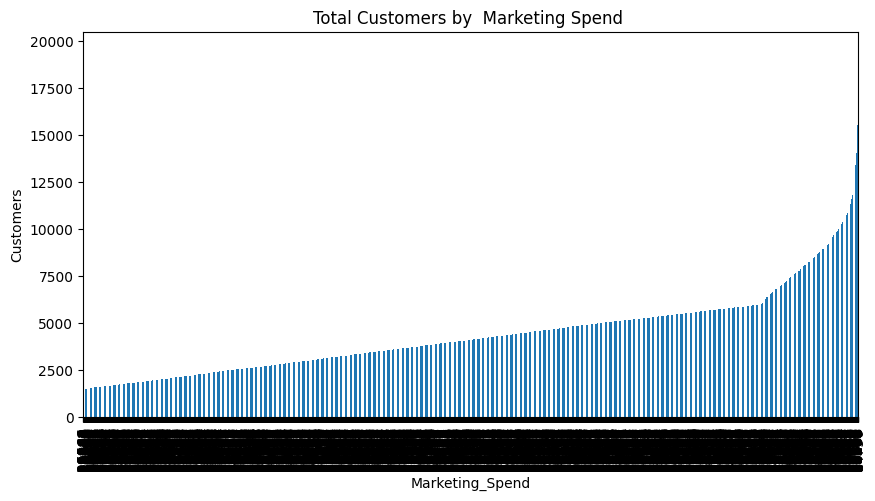

Marketing_Spend
13193     1500
25593     1502
26466     1502
19647     1503
15346     1506
         ...  
26776    15638
10968    15812
8068     16473
14756    18589
9886     19499
Name: Customers, Length: 6811, dtype: int64

In [23]:
country_revenue = df.groupby('Marketing_Spend')['Customers'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Customers by  Marketing Spend ")
plt.ylabel("Customers")
plt.show()

country_revenue

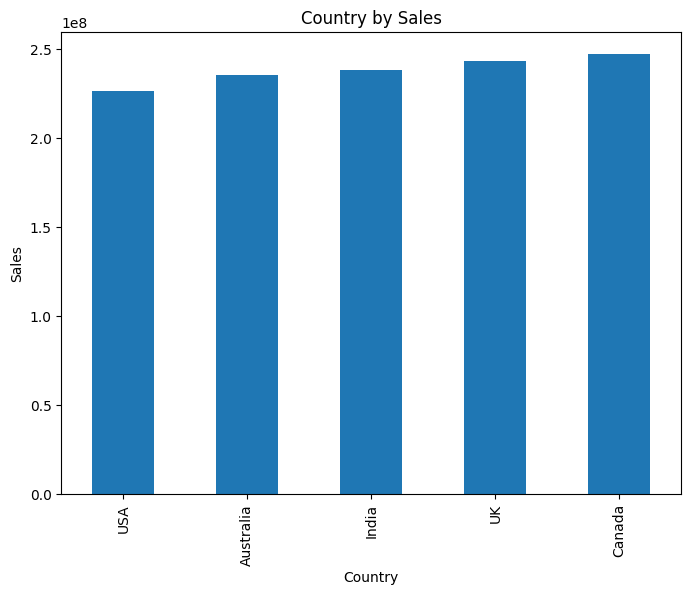

Country
USA          226516412
Australia    235368001
India        238217516
UK           243262528
Canada       247338572
Name: Sales, dtype: int64

In [32]:
product_revenue = df.groupby('Country')['Sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,6))
product_revenue.plot(kind='bar')
plt.title("Country by Sales")
plt.ylabel("Sales")
plt.show()

product_revenue

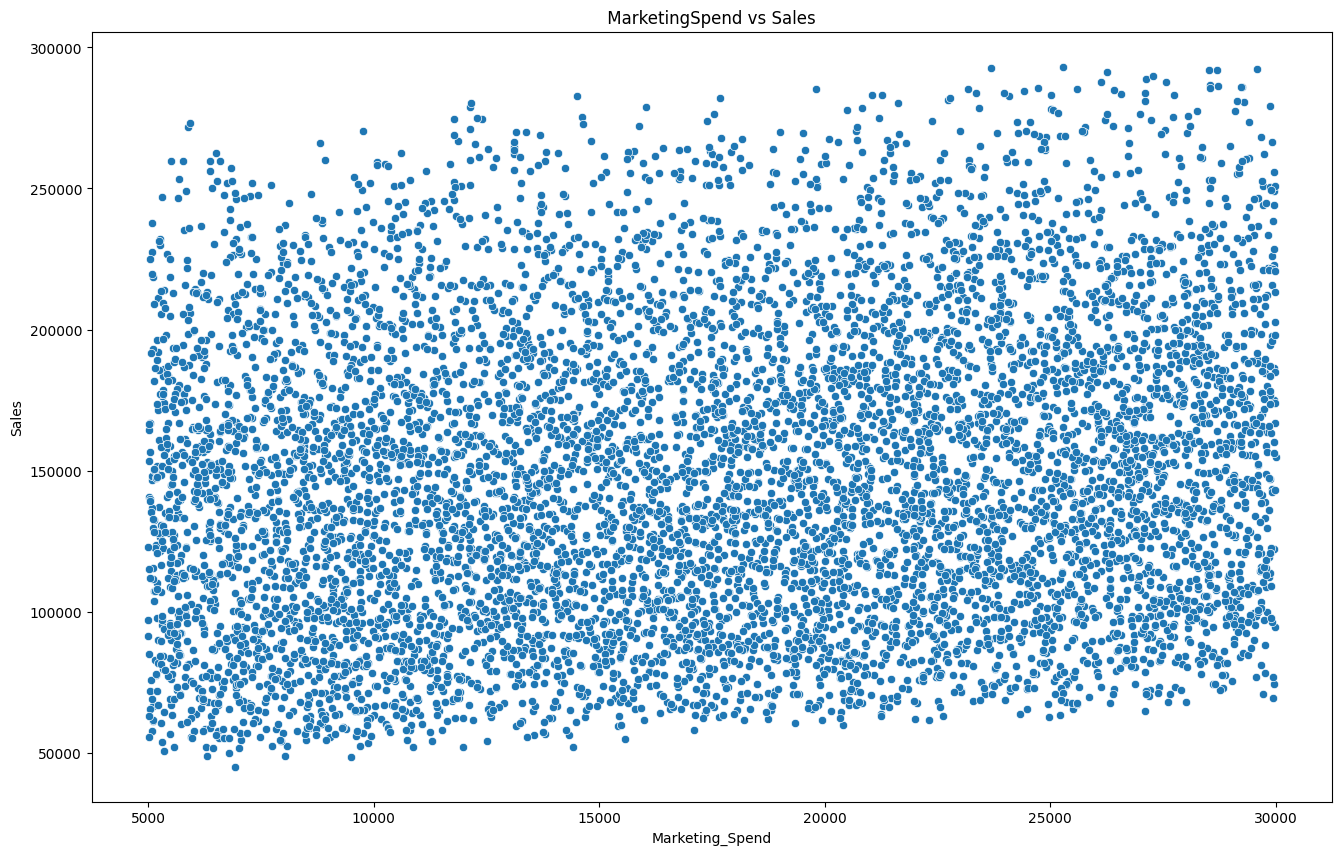

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='Marketing_Spend', y='Sales', data=df)
plt.title(" MarketingSpend vs Sales ")
plt.show()

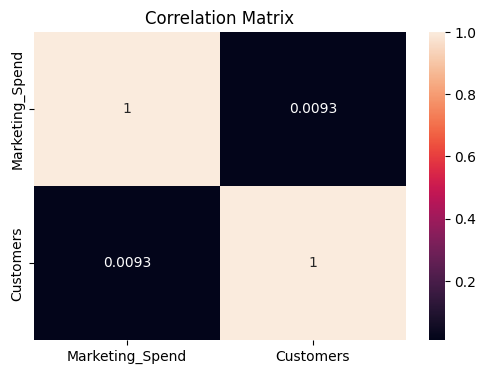

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Marketing_Spend', 'Customers']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

No data to plot


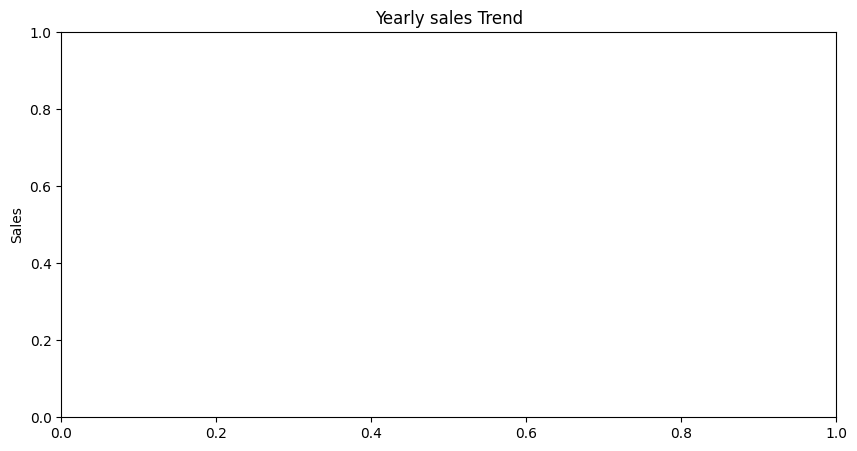

In [53]:
df['YearPeriod'] = df['Year'].dt.to_period('Y')

monthly_revenue = df.groupby('YearPeriod')['Sales'].sum()
monthly_revenue = pd.to_numeric(monthly_revenue, errors='coerce').dropna()

if monthly_revenue.empty:
    print("No data to plot")
else:
    monthly_revenue.plot()

plt.figure(figsize=(10,5))
plt.title("Yearly sales Trend")
plt.ylabel("Sales")
plt.show()